<a href="https://colab.research.google.com/github/sidddheshh/Data_Analysis_Projects/blob/main/OlympicsDatasetAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Introduction**
We are having Olympics athlete dataset in csv format, we will perform EDA on the dataset and will take out insights from it. link of the Dataset is provided below.

Link : https://drive.google.com/file/d/1y6e0eNKfyo9ILqQHszcrRuv3uQhIMm_z/view

Link : https://drive.google.com/file/d/1_zGhADzXEA9mFHvuCvpllXMCN2DUE2tH/view

# Importing Libraries

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

# Reading the dataset.

In [46]:
# converting csv file into dataframe

athlete = pd.read_csv('/content/drive/MyDrive/athlete_events.csv')
noc = pd.read_csv('/content/drive/MyDrive/noc_regions.csv')

**Creating a copy of datasets**

In [47]:
ath = athlete.copy()
cou = noc.copy()

**over-view of dataset**

In [48]:
ath.head(5)

,ID,Name,Gender,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [49]:
cou.head(5)

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN


In [50]:
ath.tail(5)

,ID,Name,Gender,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
271111,135569,Andrzej ya,M,29.0,179.0,89.0,Poland-1,POL,1976 Winter,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,NaN
271112,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",NaN
271113,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",NaN
271114,135571,Tomasz Ireneusz ya,M,30.0,185.0,96.0,Poland,POL,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,NaN
271115,135571,Tomasz Ireneusz ya,M,34.0,185.0,96.0,Poland,POL,2002 Winter,2002,Winter,Salt Lake City,Bobsleigh,Bobsleigh Men's Four,NaN


In [51]:
ath.shape

(271116, 15)

In [52]:
cou.shape

(230, 3)

In [53]:
ath.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Gender  271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


In [54]:
ath.isna().sum()

ID             0
Name           0
Gender         0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
dtype: int64

In [55]:
cou.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230 entries, 0 to 229
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   NOC     230 non-null    object
 1   region  227 non-null    object
 2   notes   21 non-null     object
dtypes: object(3)
memory usage: 5.5+ KB


In [56]:
cou.isna().sum()

NOC         0
region      3
notes     209
dtype: int64

In [57]:
# Finding out the ratio of null and not null values in the medal column

x = ath.Medal.isna().sum()
y = ath.Medal.count()
print(f"The ratio of null values to not null values is =  {x} : {y}")

The ratio of null values to not null values is =  231333 : 39783


# Data Cleaning and Manipulation

**Find all the rows (Datapoints) in the NOC dataframe where region is NaN**

In [58]:
cou[cou.region.isna()]

,NOC,region,notes
168,ROT,NaN,Refugee Olympic Team
208,TUV,NaN,Tuvalu
213,UNK,NaN,Unknown


displaying all the rows from the athlete DataFrame where the region is ROT, TUV & UNK

In [59]:
ath.loc[ath.NOC.isin(["ROT", "TUV", "UNK"])]

,ID,Name,Gender,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
6267,3515,Paulo Amotun Lokoro,M,24.0,170.0,61.0,Refugee Olympic Athletes,ROT,2016 Summer,2016,Summer,Rio de Janeiro,Athletics,"Athletics Men's 1,500 metres",NaN
7908,4379,Rami Anis,M,25.0,178.0,78.0,Refugee Olympic Athletes,ROT,2016 Summer,2016,Summer,Rio de Janeiro,Swimming,Swimming Men's 100 metres Freestyle,NaN
7909,4379,Rami Anis,M,25.0,178.0,78.0,Refugee Olympic Athletes,ROT,2016 Summer,2016,Summer,Rio de Janeiro,Swimming,Swimming Men's 100 metres Butterfly,NaN
21529,11364,Yiech Pur Biel,M,21.0,178.0,62.0,Refugee Olympic Athletes,ROT,2016 Summer,2016,Summer,Rio de Janeiro,Athletics,Athletics Men's 800 metres,NaN
31708,16287,Mabika Yolande Bukasa,F,28.0,170.0,70.0,Refugee Olympic Athletes,ROT,2016 Summer,2016,Summer,Rio de Janeiro,Judo,Judo Women's Middleweight,NaN
40238,20693,James Nyang Chiengjiek,M,24.0,179.0,59.0,Refugee Olympic Athletes,ROT,2016 Summer,2016,Summer,Rio de Janeiro,Athletics,Athletics Men's 400 metres,NaN
61080,31292,Fritz Eccard,M,NaN,NaN,NaN,Unknown,UNK,1912 Summer,1912,Summer,Stockholm,Art Competitions,Art Competitions Mixed Architecture,NaN
64674,33094,Logona Esau,M,21.0,163.0,69.0,Tuvalu,TUV,2008 Summer,2008,Summer,Beijing,Weightlifting,Weightlifting Men's Lightweight,NaN
119392,60444,Yonas Kinde,M,36.0,172.0,57.0,Refugee Olympic Athletes,ROT,2016 Summer,2016,Summer,Rio de Janeiro,Athletics,Athletics Men's Marathon,NaN
130721,65813,A. Laffen,M,NaN,NaN,NaN,Unknown,UNK,1912 Summer,1912,Summer,Stockholm,Art Competitions,Art Competitions Mixed Architecture,NaN


**Add a column "Region" to the ath DataFrame. And the region column should have the region according to the elements in the NOC column of the countries dataFrame.**




In [60]:
region = ath.NOC.map(cou.set_index("NOC")['region'])

In [61]:
ath.insert(7, "Region", region)

In [62]:
# deleting the NOC coloumn

ath.drop('NOC',axis = 1, inplace = True)

In [63]:
ath.head()

,ID,Name,Gender,Age,Height,Weight,Team,Region,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,China,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,China,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,Denmark,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,Denmark,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,Netherlands,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


**Handling NULL values in columns : AGE, Height, weight, Medal**

AGE

In [64]:
# finding min age 
ath.Age.min()

10.0

In [65]:
# finding max age 
ath.Age.max()

97.0

In [66]:
ath.Age.describe()

count    261642.000000
mean         25.556898
std           6.393561
min          10.000000
25%          21.000000
50%          24.000000
75%          28.000000
max          97.000000
Name: Age, dtype: float64

In [67]:
# filling all the nan values with the mean value of the age column 
mean = ath.Age.mean()
ath.Age.fillna(mean , inplace = True)

In [68]:
ath.Age = ath.Age.astype(int)

In [69]:
ath.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Gender  271116 non-null  object 
 3   Age     271116 non-null  int64  
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   Region  270746 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(2), int64(3), object(10)
memory usage: 31.0+ MB


Fixing Height & Weight

In [70]:
ath.Height.describe()

count    210945.000000
mean        175.338970
std          10.518462
min         127.000000
25%         168.000000
50%         175.000000
75%         183.000000
max         226.000000
Name: Height, dtype: float64

In [71]:
# we are replacing the null height and weight with mean values because the difference
# between them is negligible

ath.Height.fillna(ath.Height.mean() , inplace = True)
ath.Weight.fillna(ath.Weight.mean() , inplace = True)

In [72]:
ath.Height = ath.Height.astype(float)
ath.Weight = ath.Weight.astype(float)

In [73]:
ath.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Gender  271116 non-null  object 
 3   Age     271116 non-null  int64  
 4   Height  271116 non-null  float64
 5   Weight  271116 non-null  float64
 6   Team    271116 non-null  object 
 7   Region  270746 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(2), int64(3), object(10)
memory usage: 31.0+ MB


list all the values of region column where values are null

In [74]:
ath[ath.Region.isna()]

,ID,Name,Gender,Age,Height,Weight,Team,Region,Games,Year,Season,City,Sport,Event,Medal
578,332,Zarinah Abdullah,F,21,175.33897,70.702393,Singapore,NaN,1992 Summer,1992,Summer,Barcelona,Badminton,Badminton Women's Singles,NaN
579,332,Zarinah Abdullah,F,25,175.33897,70.702393,Singapore,NaN,1996 Summer,1996,Summer,Atlanta,Badminton,Badminton Women's Singles,NaN
2719,1515,Saiyidah Aisyah Mohamed Rafa'ee,F,28,173.00000,68.000000,Singapore,NaN,2016 Summer,2016,Summer,Rio de Janeiro,Rowing,Rowing Women's Single Sculls,NaN
6267,3515,Paulo Amotun Lokoro,M,24,170.00000,61.000000,Refugee Olympic Athletes,NaN,2016 Summer,2016,Summer,Rio de Janeiro,Athletics,"Athletics Men's 1,500 metres",NaN
7659,4264,Ang Peng Siong,M,21,180.00000,75.000000,Singapore,NaN,1984 Summer,1984,Summer,Los Angeles,Swimming,Swimming Men's 100 metres Freestyle,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268752,134454,Zhang Guirong,F,26,182.00000,95.000000,Singapore,NaN,2004 Summer,2004,Summer,Athina,Athletics,Athletics Women's Shot Put,NaN
268753,134454,Zhang Guirong,F,30,182.00000,95.000000,Singapore,NaN,2008 Summer,2008,Summer,Beijing,Athletics,Athletics Women's Shot Put,NaN
268993,134587,Zhang Xueling,F,21,163.00000,53.000000,Singapore,NaN,2004 Summer,2004,Summer,Athina,Table Tennis,Table Tennis Women's Singles,NaN
268994,134587,Zhang Xueling,F,21,163.00000,53.000000,Singapore-1,NaN,2004 Summer,2004,Summer,Athina,Table Tennis,Table Tennis Women's Doubles,NaN


In [76]:
# changing all the null values with corresponding team value


ath.Region.fillna("Team" , inplace = True)

In [77]:
ath.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Gender  271116 non-null  object 
 3   Age     271116 non-null  int64  
 4   Height  271116 non-null  float64
 5   Weight  271116 non-null  float64
 6   Team    271116 non-null  object 
 7   Region  271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(2), int64(3), object(10)
memory usage: 31.0+ MB


handling null values in Medal column

In [78]:
ath.Medal.unique()

array([nan, 'Gold', 'Bronze', 'Silver'], dtype=object)

In [79]:
ath.Medal.value_counts()

Gold      13372
Bronze    13295
Silver    13116
Name: Medal, dtype: int64

**Replacing** :

NAN -> 0 

Gold -> 1 

Silver -> 2 

Bronze -> 3

In [80]:
ath.Medal.replace("Gold",1)
ath.Medal.replace("Silver",2)
ath.Medal.replace("Bronze",3)
ath.Medal.replace(np.nan,0)

0            0
1            0
2            0
3         Gold
4            0
          ... 
271111       0
271112       0
271113       0
271114       0
271115       0
Name: Medal, Length: 271116, dtype: object

In [81]:
ath.Medal.replace([np.nan,'Gold','Silver','Bronze'],[0,1,2,3], inplace = True)

In [82]:
ath.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Gender  271116 non-null  object 
 3   Age     271116 non-null  int64  
 4   Height  271116 non-null  float64
 5   Weight  271116 non-null  float64
 6   Team    271116 non-null  object 
 7   Region  271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   271116 non-null  int64  
dtypes: float64(2), int64(4), object(9)
memory usage: 31.0+ MB


All the null values are fixed.

In [83]:
# Deleting unwanted columns ID, region (since Team and region columns are very similar), Games (we are having seperate year and seasons columns for the same)

ath.drop(['ID','Region','Games'], axis =1, inplace = True )

In [84]:
ath.head(2)

,Name,Gender,Age,Height,Weight,Team,Year,Season,City,Sport,Event,Medal
0,A Dijiang,M,24,180.0,80.0,China,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,0
1,A Lamusi,M,23,170.0,60.0,China,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,0


**Removing unwanted phrases from the event column**

In [85]:
ath[['Sport','Event']]

,Sport,Event
0,Basketball,Basketball Men's Basketball
1,Judo,Judo Men's Extra-Lightweight
2,Football,Football Men's Football
3,Tug-Of-War,Tug-Of-War Men's Tug-Of-War
4,Speed Skating,Speed Skating Women's 500 metres
...,...,...
271111,Luge,Luge Mixed (Men)'s Doubles
271112,Ski Jumping,"Ski Jumping Men's Large Hill, Individual"
271113,Ski Jumping,"Ski Jumping Men's Large Hill, Team"
271114,Bobsleigh,Bobsleigh Men's Four


In [86]:
# removing first occurence of sport name from the event column 

ath.Event[0].split(" ")[0]

'Basketball'

In [87]:
ath[ath.Sport == ath.Event[0].split(" ")[0]]

,Name,Gender,Age,Height,Weight,Team,Year,Season,City,Sport,Event,Medal
0,A Dijiang,M,24,180.00000,80.000000,China,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,0
167,Tamara Abalde Daz,F,19,185.00000,72.000000,Spain,2008,Summer,Beijing,Basketball,Basketball Women's Basketball,0
250,Youssef Mohamed Abbas,M,31,175.33897,70.702393,Egypt,1952,Summer,Helsinki,Basketball,Basketball Men's Basketball,0
264,Alessandro Abbio,M,29,195.00000,85.000000,Italy,2000,Summer,Sydney,Basketball,Basketball Men's Basketball,0
346,Ahmed El-Sayed Abdel Hamid Mobarak,M,25,189.00000,85.000000,Egypt,1972,Summer,Munich,Basketball,Basketball Men's Basketball,0
...,...,...,...,...,...,...,...,...,...,...,...,...
270742,Eurelijus ukauskas,M,30,218.00000,115.000000,Lithuania,2004,Summer,Athina,Basketball,Basketball Men's Basketball,0
270743,Mindaugas ukauskas,M,20,201.00000,100.000000,Lithuania,1996,Summer,Atlanta,Basketball,Basketball Men's Basketball,3
270744,Mindaugas ukauskas,M,28,201.00000,100.000000,Lithuania,2004,Summer,Athina,Basketball,Basketball Men's Basketball,0
271026,Philip Zwiener,M,23,202.00000,98.000000,Germany,2008,Summer,Beijing,Basketball,Basketball Men's Basketball,0


In [88]:
for i,j in zip(ath.Sport , range(len(ath.Event))):
  ath.Event[j] = re.sub(f'^{i}\s','',ath.Event[j])

<ipython-input-88-797956e2f55a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ath.Event[j] = re.sub(f'^{i}\s','',ath.Event[j])


In [89]:
ath.head(2)

,Name,Gender,Age,Height,Weight,Team,Year,Season,City,Sport,Event,Medal
0,A Dijiang,M,24,180.0,80.0,China,1992,Summer,Barcelona,Basketball,Men's Basketball,0
1,A Lamusi,M,23,170.0,60.0,China,2012,Summer,London,Judo,Men's Extra-Lightweight,0


In [90]:
ath.duplicated().sum()

1385

In [91]:
ath[ath.duplicated()]

,Name,Gender,Age,Height,Weight,Team,Year,Season,City,Sport,Event,Medal
1252,Dsir Antoine Acket,M,27,175.33897,70.702393,Belgium,1932,Summer,Los Angeles,Art Competitions,"Mixed Painting, Unknown Event",0
4282,William Truman Aldrich,M,48,175.33897,70.702393,United States,1928,Summer,Amsterdam,Art Competitions,"Mixed Painting, Drawings And Water Colors",0
4283,William Truman Aldrich,M,48,175.33897,70.702393,United States,1928,Summer,Amsterdam,Art Competitions,"Mixed Painting, Drawings And Water Colors",0
4862,Hermann Reinhard Alker,M,43,175.33897,70.702393,Germany,1928,Summer,Amsterdam,Art Competitions,"Mixed Architecture, Designs For Town Planning",0
4864,Hermann Reinhard Alker,M,43,175.33897,70.702393,Germany,1928,Summer,Amsterdam,Art Competitions,"Mixed Architecture, Architectural Designs",0
...,...,...,...,...,...,...,...,...,...,...,...,...
269994,Anna Katrina Zinkeisen (-Heseltine),F,46,175.33897,70.702393,Great Britain,1948,Summer,London,Art Competitions,"Mixed Painting, Paintings",0
269995,Anna Katrina Zinkeisen (-Heseltine),F,46,175.33897,70.702393,Great Britain,1948,Summer,London,Art Competitions,"Mixed Painting, Paintings",0
269997,Anna Katrina Zinkeisen (-Heseltine),F,46,175.33897,70.702393,Great Britain,1948,Summer,London,Art Competitions,"Mixed Painting, Unknown Event",0
269999,Doris Clare Zinkeisen (-Johnstone),F,49,175.33897,70.702393,Great Britain,1948,Summer,London,Art Competitions,"Mixed Painting, Unknown Event",0


In [92]:
ath[ath.Name == 'William Truman Aldrich']

,Name,Gender,Age,Height,Weight,Team,Year,Season,City,Sport,Event,Medal
4281,William Truman Aldrich,M,48,175.33897,70.702393,United States,1928,Summer,Amsterdam,Art Competitions,"Mixed Painting, Drawings And Water Colors",0
4282,William Truman Aldrich,M,48,175.33897,70.702393,United States,1928,Summer,Amsterdam,Art Competitions,"Mixed Painting, Drawings And Water Colors",0
4283,William Truman Aldrich,M,48,175.33897,70.702393,United States,1928,Summer,Amsterdam,Art Competitions,"Mixed Painting, Drawings And Water Colors",0


In [93]:
# deleting all the duplicate values 

ath.drop_duplicates(inplace = True)

In [94]:
# resetting index

ath.reset_index(inplace = True)

In [95]:
ath.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 269731 entries, 0 to 269730
Data columns (total 13 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   index   269731 non-null  int64  
 1   Name    269731 non-null  object 
 2   Gender  269731 non-null  object 
 3   Age     269731 non-null  int64  
 4   Height  269731 non-null  float64
 5   Weight  269731 non-null  float64
 6   Team    269731 non-null  object 
 7   Year    269731 non-null  int64  
 8   Season  269731 non-null  object 
 9   City    269731 non-null  object 
 10  Sport   269731 non-null  object 
 11  Event   269731 non-null  object 
 12  Medal   269731 non-null  int64  
dtypes: float64(2), int64(4), object(7)
memory usage: 26.8+ MB


In [96]:
ath.drop('index', axis = 1 , inplace = True)

In [97]:
ath.head(2)

,Name,Gender,Age,Height,Weight,Team,Year,Season,City,Sport,Event,Medal
0,A Dijiang,M,24,180.0,80.0,China,1992,Summer,Barcelona,Basketball,Men's Basketball,0
1,A Lamusi,M,23,170.0,60.0,China,2012,Summer,London,Judo,Men's Extra-Lightweight,0


# Data Exportation

In [98]:
# exporting data to json file 

ath.to_csv('olympics_dataset.csv')

# Data Analysis

Q1. **Show the relationship b/w Height & Weight**

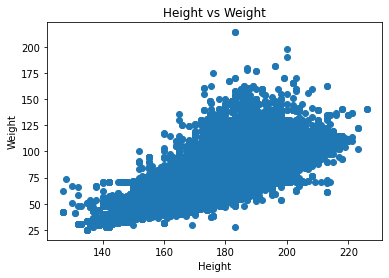

In [99]:
# we can use scatter plot  

plt.scatter(ath.Height, ath.Weight)
plt.xlabel('Height')
plt.ylabel('Weight')
plt.title("Height vs Weight")
plt.show()

Q2. **Find out how many Male & Female has participated in the Olympics w.r.t. the given dataset (Data Visulisation)**

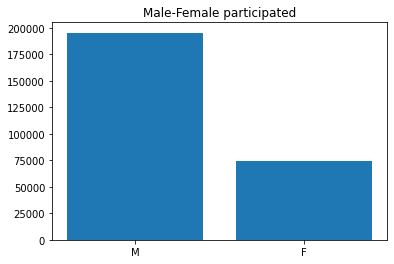

In [100]:
plt.bar(ath.Gender.unique(),ath.Gender.value_counts())
plt.title('Male-Female participated')
plt.show()

Q3. **How many Male and Female have participated in the Summer & Winter Olympics**

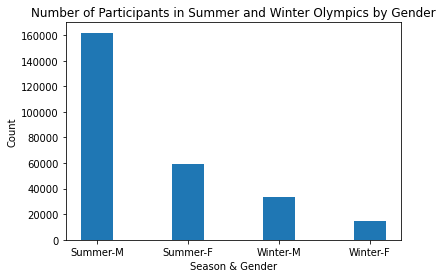

In [151]:

# Create a data frame containing the count of each gender in each season
df_summer_m = ath[(ath['Season'] == 'Summer') & (ath['Gender'] == 'M')].count()[0]
df_summer_f = ath[(ath['Season'] == 'Summer') & (ath['Gender'] == 'F')].count()[0]
df_winter_m = ath[(ath['Season'] == 'Winter') & (ath['Gender'] == 'M')].count()[0]
df_winter_f = ath[(ath['Season'] == 'Winter') & (ath['Gender'] == 'F')].count()[0]

# Plot the bar graph
fig, ax = plt.subplots()
bar_width = 0.35
bar1 = ax.bar(['Summer-M', 'Summer-F', 'Winter-M', 'Winter-F'], [df_summer_m, df_summer_f, df_winter_m, df_winter_f], bar_width)

ax.set_xlabel('Season & Gender')
ax.set_ylabel('Count')
ax.set_title('Number of Participants in Summer and Winter Olympics by Gender')

plt.show()


Q4 . **Name the Top 5 countries who're having the most medals**

In [113]:
m = ath.groupby('Team')['Medal'].sum().sort_values(ascending = False)
p=m[0:5]
p

Team
United States    9197
Soviet Union     4521
Germany          3967
Great Britain    3399
France           3222
Name: Medal, dtype: int64

Q5. **Who is the most decorated athlete of all the time.**

In [126]:
a = ath.groupby('Name')['Medal'].sum().sort_values(ascending = False)
v = a.index[0]
print(f"The most decorated athlete of all time is {v} having recevied {a[0]} medals.")

The most decorated athlete of all time is Michael Fred Phelps, II having recevied 35 medals.


Q6. **Name all the cities where the 2012 Olympics was held.**

In [102]:
f = ath.City[ath.Year == 2012].unique()
print(f"The cities/city where 2012 olympics held is/are {f[0]}")

The cities/city where 2012 olympics held is/are London


Q7. **Name all the athletes who has participated in the game 'Judo'**

In [103]:
ath.Name[ath.Sport == 'Judo']

1                          A Lamusi
160                  M'Bairo Abakar
180                    Salim Abanoz
412            Mohamed Ali Abdelaal
435               Ahmed Abdelrahman
                    ...            
269468               Oleg Zurabiani
269533                  Goran uvela
269596              Zurab Zviadauri
269647    Claudia Antoinette Zwiers
269648    Claudia Antoinette Zwiers
Name: Name, Length: 3801, dtype: object

Q8. **Show the number of participants in every edition of olympics**

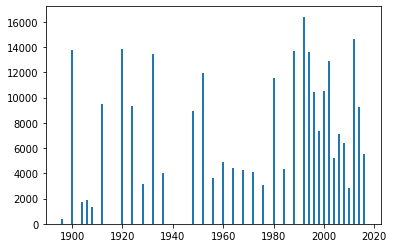

In [104]:
plt.bar(ath.Year.unique(), ath.Year.value_counts())
plt.show()

Q9. Name the youngest and the oldest players in OLYMPICS history.

In [105]:
p = ath.Name.loc[ath.Age==ath.Age.min()].iloc[0]
q = ath.Name.loc[ath.Age==ath.Age.max()].iloc[0]

print(f"The Youngest player was {p} with Age : {ath.Age.min()} played in year {ath.Year[ath.Name == p].iloc[0]}")
print(f"The Oldest player was {q} with Age : {ath.Age.max()} played in year {ath.Year[ath.Name == q].iloc[0]}")

The Youngest player was Dimitrios Loundras with Age : 10 played in year 1896
The Oldest player was John Quincy Adams Ward with Age : 97 played in year 1928


Q10. **Name the Country with most medals over all these years.**

In [106]:
m = ath.groupby('Team')['Medal'].sum().sort_values(ascending = False)
p=m.index[0]
print(f"The Country with most Olympic medals is {p} having total of {m[0]} medals")


The Country with most Olympic medals is United States having total of 9197 medals


# Conclusion 
This analysis of the Olympics database reveals insights into the participation of male and female athletes in summer and winter events. The data shows a clear trend of the number of athletes participating in each season and gender, with summer having a higher number of participants compared to winter. The data also shows a gender distribution of athletes, with a higher number of male athletes participating in both summer and winter events. These findings provide a useful basis for understanding the participation of athletes in the Olympics and can be used to develop strategies for promoting gender equality and increasing participation in the games.